In [45]:
import warnings 
warnings.filterwarnings("ignore")

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pickle
pd.set_option("display.max_columns",None)
plt.rcParams["font.size"]=20

In [47]:
df=pd.read_csv("C:\\Users\\muska\\OneDrive\\Documents\\ddosdataset.csv")

In [48]:
df.shape

(225745, 79)

In [49]:
df.head()

Destination Port   Flow Duration   Total Fwd Packets  \
0              54865               3                   2   
1              55054             109                   1   
2              55055              52                   1   
3              46236              34                   1   
4              54863               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        1                            6   
2                        1                            6   
3                        1                            6   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             6                       6   
2                             6                       6   
3                             6                       6   
4                             0                       6   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
0                       6                      6.0                     0.0   
1                       6                      6.0                     0.0   
2                       6                      6.0                     0.0   
3                       6                      6.0                     0.0   
4                       6                      6.0                     0.0   

   Bwd Packet Length Max   Bwd Packet Length Min   Bwd Packet Length Mean  \
0                      0                       0                      0.0   
1                      6                       6                      6.0   
2                      6                       6                      6.0   
3                      6                       6                      6.0   
4                      0                       0                      0.0   

    Bwd Packet Length Std  Flow Bytes/s   Flow Packets/s   Flow IAT Mean  \
0                     0.0  4.000000e+06     666666.66670             3.0   
1                     0.0  1.100917e+05      18348.62385           109.0   
2                     0.0  2.307692e+05      38461.53846            52.0   
3                     0.0  3.529412e+05      58823.52941            34.0   
4                     0.0  4.000000e+06     666666.66670             3.0   

    Flow IAT Std   Flow IAT Max   Flow IAT Min  Fwd IAT Total   Fwd IAT Mean  \
0            0.0              3              3              3            3.0   
1            0.0            109            109              0            0.0   
2            0.0             52             52              0            0.0   
3            0.0             34             34              0            0.0   
4            0.0              3              3              3            3.0   

    Fwd IAT Std   Fwd IAT Max   Fwd IAT Min  Bwd IAT Total   Bwd IAT Mean  \
0           0.0             3             3              0            0.0   
1           0.0             0             0              0            0.0   
2           0.0             0             0              0            0.0   
3           0.0             0             0              0            0.0   
4           0.0             3             3              0            0.0   

    Bwd IAT Std   Bwd IAT Max   Bwd IAT Min  Fwd PSH Flags   Bwd PSH Flags  \
0           0.0             0             0              0               0   
1           0.0             0             0              0               0   
2           0.0             0             0              0               0   
3           0.0             0             0              0               0   
4           0.0             0             0              0               0   

    Fwd URG Flags   Bwd URG Flags   Fwd Header Length   Bwd Header Length  \
0               0               0                  40 

In [50]:
df.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [51]:
nullvalue_features=[feature for feature in df.columns if df[feature].isnull().sum()>0]

In [52]:
print(nullvalue_features)

['Flow Bytes/s']


In [53]:
df['Flow Bytes/s'].isnull().sum()

np.int64(4)

In [54]:
df=df.dropna().drop_duplicates(keep="first").reset_index(drop=True)

In [55]:
df.shape

(223108, 79)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223108 entries, 0 to 223107
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             223108 non-null  int64  
 1    Flow Duration                223108 non-null  int64  
 2    Total Fwd Packets            223108 non-null  int64  
 3    Total Backward Packets       223108 non-null  int64  
 4   Total Length of Fwd Packets   223108 non-null  int64  
 5    Total Length of Bwd Packets  223108 non-null  int64  
 6    Fwd Packet Length Max        223108 non-null  int64  
 7    Fwd Packet Length Min        223108 non-null  int64  
 8    Fwd Packet Length Mean       223108 non-null  float64
 9    Fwd Packet Length Std        223108 non-null  float64
 10  Bwd Packet Length Max         223108 non-null  int64  
 11   Bwd Packet Length Min        223108 non-null  int64  
 12   Bwd Packet Length Mean       223108 non-nul

In [57]:
df[' Label'].unique()

array(['BENIGN', 'DDoS'], dtype=object)

In [58]:
df[' Label'].value_counts()

 Label
DDoS      128016
BENIGN     95092
Name: count, dtype: int64

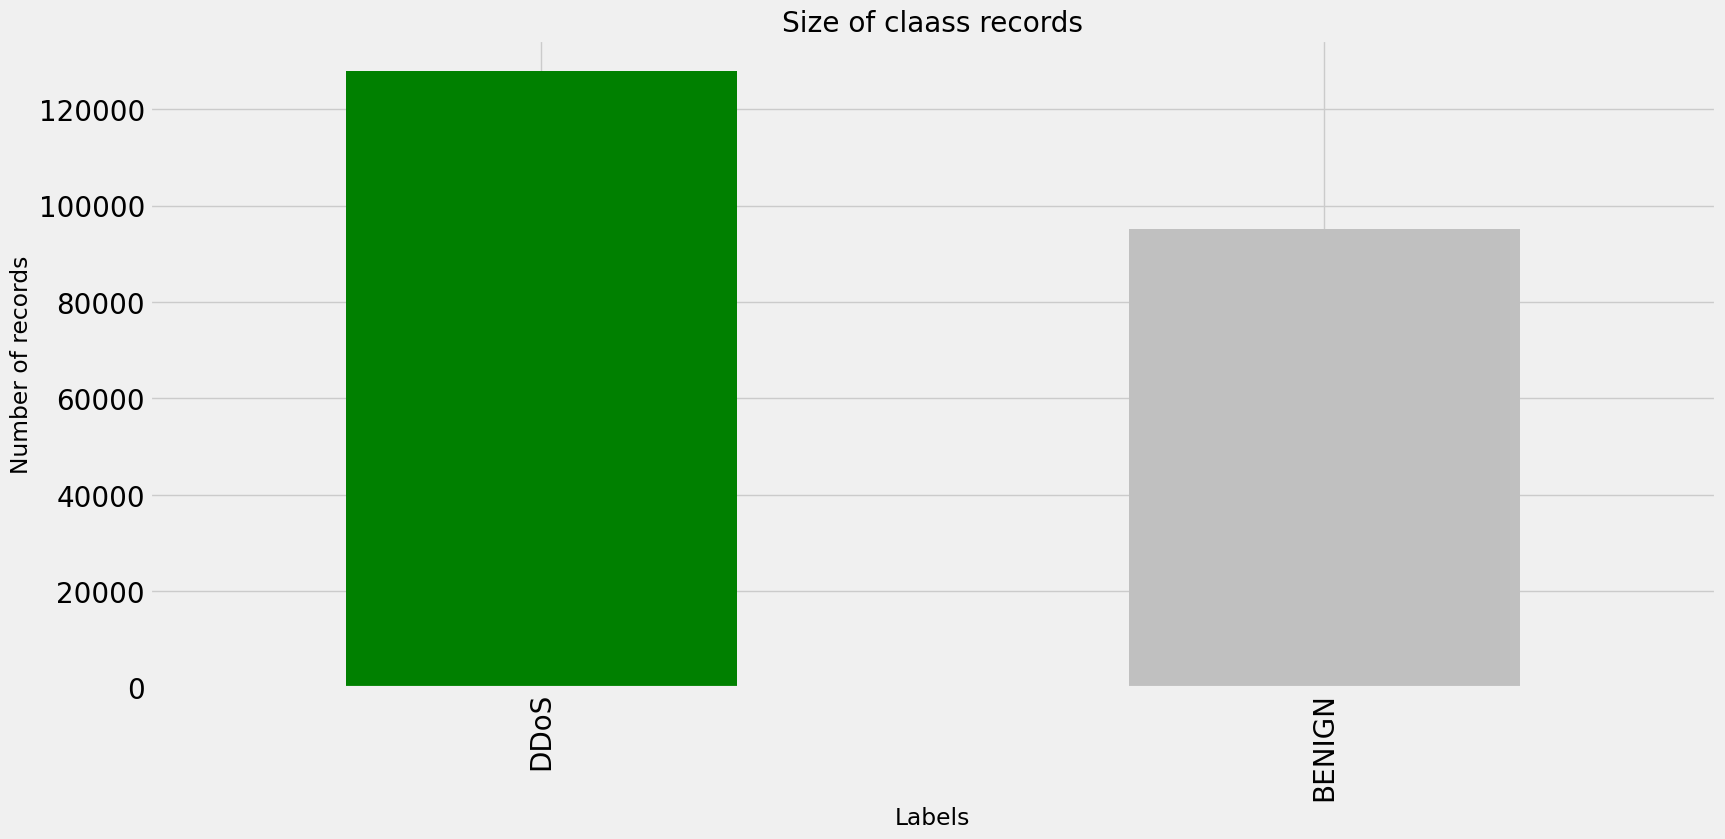

In [59]:
with plt.style.context(style="fivethirtyeight"):
    df[' Label'].value_counts().plot.bar(fontsize=20,figsize=(18,8),color=["green","silver"])
    plt.title(label="Size of claass records")
    plt.xlabel(xlabel="Labels")
    plt.ylabel(ylabel="Number of records")
    plt.show()

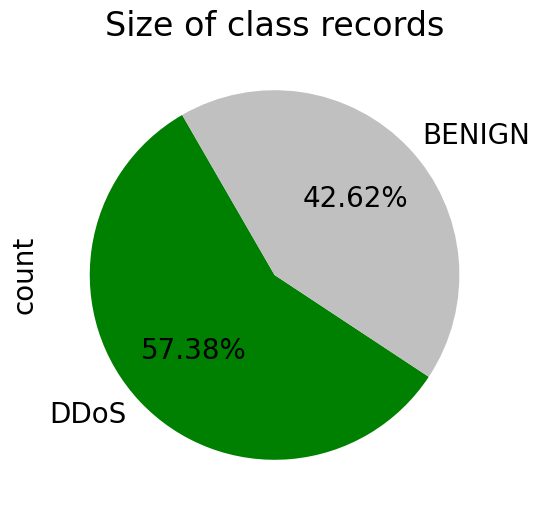

In [60]:
df[' Label'].value_counts().plot.pie(fontsize=20,figsize=(6,6),colors=["green","silver"],autopct="%.2f%%",startangle=120)
plt.title(label="Size of class records")
plt.show()

In [61]:
categorical_features = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
print("Number of categorical features:",len(categorical_features))
print("Name of the categorical features:",categorical_features)

Number of categorical features: 1
Name of the categorical features: [' Label']


In [62]:
df[' Label']=df[' Label'].apply(lambda x: 0 if x=='BENIGN' else 1)

In [63]:
df.head()

Destination Port   Flow Duration   Total Fwd Packets  \
0              54865               3                   2   
1              55054             109                   1   
2              55055              52                   1   
3              46236              34                   1   
4              54863               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        1                            6   
2                        1                            6   
3                        1                            6   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             6                       6   
2                             6                       6   
3                             6                       6   
4                             0                       6   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
0                       6                      6.0                     0.0   
1                       6                      6.0                     0.0   
2                       6                      6.0                     0.0   
3                       6                      6.0                     0.0   
4                       6                      6.0                     0.0   

   Bwd Packet Length Max   Bwd Packet Length Min   Bwd Packet Length Mean  \
0                      0                       0                      0.0   
1                      6                       6                      6.0   
2                      6                       6                      6.0   
3                      6                       6                      6.0   
4                      0                       0                      0.0   

    Bwd Packet Length Std  Flow Bytes/s   Flow Packets/s   Flow IAT Mean  \
0                     0.0  4.000000e+06     666666.66670             3.0   
1                     0.0  1.100917e+05      18348.62385           109.0   
2                     0.0  2.307692e+05      38461.53846            52.0   
3                     0.0  3.529412e+05      58823.52941            34.0   
4                     0.0  4.000000e+06     666666.66670             3.0   

    Flow IAT Std   Flow IAT Max   Flow IAT Min  Fwd IAT Total   Fwd IAT Mean  \
0            0.0              3              3              3            3.0   
1            0.0            109            109              0            0.0   
2            0.0             52             52              0            0.0   
3            0.0             34             34              0            0.0   
4            0.0              3              3              3            3.0   

    Fwd IAT Std   Fwd IAT Max   Fwd IAT Min  Bwd IAT Total   Bwd IAT Mean  \
0           0.0             3             3              0            0.0   
1           0.0             0             0              0            0.0   
2           0.0             0             0              0            0.0   
3           0.0             0             0              0            0.0   
4           0.0             3             3              0            0.0   

    Bwd IAT Std   Bwd IAT Max   Bwd IAT Min  Fwd PSH Flags   Bwd PSH Flags  \
0           0.0             0             0              0               0   
1           0.0             0             0              0               0   
2           0.0             0             0              0               0   
3           0.0             0             0              0               0   
4           0.0             0             0              0               0   

    Fwd URG Flags   Bwd URG Flags   Fwd Header Length   Bwd Header Length  \
0               0               0                  40 

In [64]:
df[' Label'].value_counts()

 Label
1    128016
0     95092
Name: count, dtype: int64

In [65]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]


In [66]:
benign = df[df[' Label'] == 0].sample(n=2500, random_state=42)
malicious = df[df[' Label'] == 1].sample(n=2500, random_state=42)

test_data = pd.concat([benign, malicious]).sample(frac=1, random_state=42).reset_index(drop=True)
test_data.to_csv('val_data.csv', index=False)


In [67]:
df=df.sample(frac=1).reset_index(drop=True)
X=df.drop(labels=' Label',axis=1)
y=df[' Label']

In [68]:
X.head()

Destination Port   Flow Duration   Total Fwd Packets  \
0                 80         1677957                   3   
1              56052              56                   1   
2              47830              52                   1   
3                 53          224260                   2   
4                 80         5868214                   4   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        6                           26   
1                        1                            6   
2                        1                            0   
3                        2                           56   
4                        0                           24   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                         11601                      20   
1                             6                       6   
2                             0                       0   
3                           228                      28   
4                             0                       6   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
0                       0                 8.666667               10.263203   
1                       6                 6.000000                0.000000   
2                       0                 0.000000                0.000000   
3                      28                28.000000                0.000000   
4                       6                 6.000000                0.000000   

   Bwd Packet Length Max   Bwd Packet Length Min   Bwd Packet Length Mean  \
0                   5840                       0                   1933.5   
1                      6                       6                      6.0   
2                      0                       0                      0.0   
3                    114                     114                    114.0   
4                      0                       0                      0.0   

    Bwd Packet Length Std   Flow Bytes/s   Flow Packets/s   Flow IAT Mean  \
0             2189.772933    6929.259808         5.363665    2.097446e+05   
1                0.000000  214285.714300     35714.285710    5.600000e+01   
2                0.000000       0.000000     38461.538460    5.200000e+01   
3                0.000000    1266.387229        17.836440    7.475333e+04   
4                0.000000       4.089830         0.681638    1.956071e+06   

    Flow IAT Std   Flow IAT Max   Flow IAT Min  Fwd IAT Total   Fwd IAT Mean  \
0   5.910242e+05        1672451             14           4993       2496.500   
1   0.000000e+00             56             56              0          0.000   
2   0.000000e+00             52             52              0          0.000   
3   1.294315e+05         224208              4             48         48.000   
4   3.387155e+06        5867221              4        5868214    1956071.333   

    Fwd IAT Std   Fwd IAT Max   Fwd IAT Min  Bwd IAT Total   Bwd IAT Mean  \
0  2.392142e+03          4188           805        1677825       335565.0   
1  0.000000e+00             0             0              0            0.0   
2  0.000000e+00             0             0              0            0.0   
3  0.000000e+00            48            48              4            4.0   
4  3.387155e+06       5867221             4              0            0.0   

    Bwd IAT Std   Bwd IAT Max   Bwd IAT Min  Fwd PSH Flags   Bwd PSH Flags  \
0   747345.1805       1672451            14              0               0   
1        0.0000             0             0              0               0   
2        0.0000             0             0              0               0   
3        0.0000             4             4              0               0   
4        0.0000             0             0              0               0   

    Fwd URG Flags   Bwd URG Flags   Fwd Header Length   Bwd Header Length  \
0               0               0               

In [69]:
y.head()

0    1
1    0
2    0
3    0
4    1
Name:  Label, dtype: int64

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [71]:
with open(file="models/Normalization_model.pkl",mode="wb") as file:
    pickle.dump(obj=scaler,file=file)

In [72]:
X=scaler.transform(X)

In [73]:
print(X)

[[1.22077764e-03 1.39829906e-02 1.03573278e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.55337850e-01 4.75000245e-07 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.29872429e-01 4.41666895e-07 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.22077764e-03 1.50388161e-02 1.03573278e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.98586950e-01 7.01888729e-01 2.58933195e-03 ... 7.50382848e-01
  6.39166667e-01 6.19821083e-02]
 [8.69773546e-01 3.51916848e-05 2.07146556e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(178465, 78) (44617, 78) (178465,) (44617,)


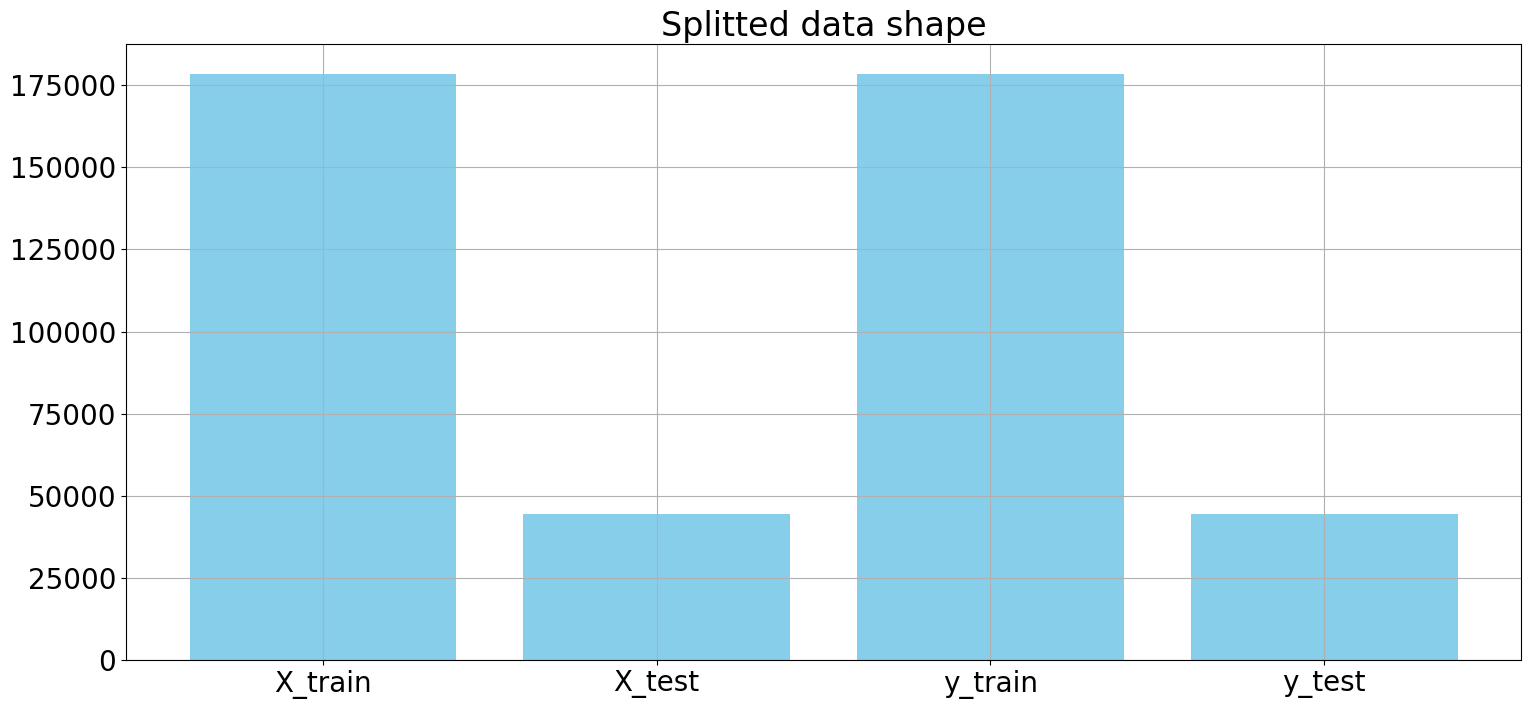

In [75]:
plt.figure(figsize=(18,8))
plt.bar(x=["X_train","X_test","y_train","y_test"],height=[X_train.shape[0],X_test.shape[0],y_train.shape[0],y_test.shape[0]], color='skyblue')
plt.grid(True)
plt.title(label="Splitted data shape")
plt.show()

In [76]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression()
LR_model.fit(X_train,y_train)

LogisticRegression()

In [77]:
LR_preds=LR_model.predict(X_test)
print(LR_preds)

[1 1 0 ... 1 1 0]


In [78]:
LR_Accuracy=accuracy_score(y_test,LR_preds)
print("Accuracy is {:.2f}%".format(LR_Accuracy*100.0))

Accuracy is 99.01%


In [79]:
print(classification_report(y_true=y_test,y_pred=LR_preds,target_names=["Benign","DDOS"]))

              precision    recall  f1-score   support

      Benign       1.00      0.98      0.99     19150
        DDOS       0.98      1.00      0.99     25467

    accuracy                           0.99     44617
   macro avg       0.99      0.99      0.99     44617
weighted avg       0.99      0.99      0.99     44617



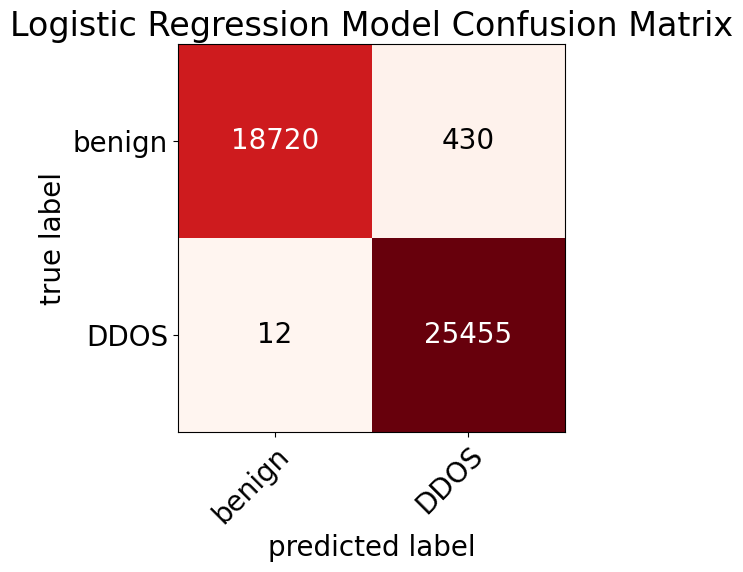

In [80]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=LR_preds)

ax = plot_confusion_matrix(conf_mat=conf_mat,
                           class_names=["benign", "DDOS"],
                           figsize=(5,8),
                           cmap=plt.cm.Reds)

plt.title("Logistic Regression Model Confusion Matrix")
plt.show()

In [81]:
with open(file="models/LogisticRegression.pkl",mode="wb")as file:
    pickle.dump(obj=LR_model,file=file)